In [1]:
import pandas as pd

## 1. Getting Data

In [2]:
train = pd.read_csv('train.csv')

## 2. Setting up Environment

In [3]:
from pycaret.classification import *
exp1 = setup(train, target = 'Survived')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,404
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 12)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## 3. Compare Models

In [4]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.808900,0.000000,0.724300,0.766400,0.744000,0.592000
1,CatBoost Classifier,0.807300,0.843700,0.619000,0.836800,0.710400,0.571100
2,Decision Tree Classifier,0.804200,0.786600,0.711200,0.771000,0.737200,0.581800
3,Logistic Regression,0.801000,0.844200,0.695100,0.767800,0.728100,0.572000
4,Light Gradient Boosting Machine,0.800900,0.835200,0.681700,0.777900,0.721900,0.568600
5,Gradient Boosting Classifier,0.797500,0.842400,0.610700,0.815600,0.696200,0.549800
6,Random Forest Classifier,0.789600,0.824000,0.598600,0.812700,0.680400,0.531300
7,Extreme Gradient Boosting,0.786400,0.828000,0.644400,0.764800,0.697700,0.534700
8,Extra Trees Classifier,0.781600,0.835200,0.652900,0.751400,0.694800,0.526900
9,Ada Boost Classifier,0.765600,0.823500,0.611400,0.737500,0.663500,0.487500


## 4. Create Best Model

In [16]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7778,0.0,0.7083,0.7083,0.7083,0.5288
1,0.9048,0.0,0.8333,0.9091,0.8696,0.7948
2,0.7778,0.0,0.6667,0.7273,0.6957,0.5212
3,0.7581,0.0,0.7083,0.6800,0.6939,0.4940
4,0.8387,0.0,0.7500,0.8182,0.7826,0.6548
5,0.7581,0.0,0.6250,0.7143,0.6667,0.4781
6,0.8548,0.0,0.7917,0.8261,0.8085,0.6917
7,0.7742,0.0,0.6667,0.7273,0.6957,0.5167
8,0.7903,0.0,0.6667,0.7619,0.7111,0.5477
9,0.8548,0.0,0.8261,0.7917,0.8085,0.6917


## 5. Tune Best Model

In [31]:
tuned_ridge = tune_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7778,0.0,0.7083,0.7083,0.7083,0.5288
1,0.9048,0.0,0.8333,0.9091,0.8696,0.7948
2,0.7937,0.0,0.7083,0.7391,0.7234,0.5590
3,0.7581,0.0,0.7083,0.6800,0.6939,0.4940
4,0.8387,0.0,0.7500,0.8182,0.7826,0.6548
5,0.7742,0.0,0.6667,0.7273,0.6957,0.5167
6,0.8548,0.0,0.7917,0.8261,0.8085,0.6917
7,0.7742,0.0,0.6667,0.7273,0.6957,0.5167
8,0.7903,0.0,0.6667,0.7619,0.7111,0.5477
9,0.8548,0.0,0.8261,0.7917,0.8085,0.6917


## 6. Plot Model

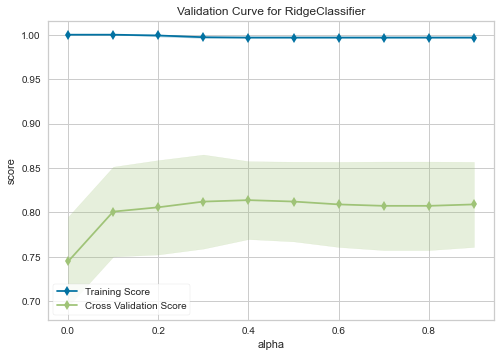

In [21]:
# Decision Boundary
plot_model(tuned_ridge, plot = 'boundary')
# Precision Recall Curve
plot_model(tuned_ridge, plot = 'pr')
# Validation Curve
plot_model(tuned_ridge, plot = 'vc')

In [20]:
evaluate_model(tuned_ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 8. Predict Model

In [24]:
# predict test / hold-out dataset
rf_holdout_pred = predict_model(tuned_ridge)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.8657,0,0.767,0.8681,0.8144,0.7098


In [27]:
test = pd.read_csv('test.csv')

In [34]:
predictions = predict_model(tuned_ridge, data = test)

In [36]:
predictions['Label']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Label, Length: 418, dtype: int32

### Submit to Kaggle : LB Score 0.75119

In [37]:
PyCaretRidge = pd.DataFrame({ 'PassengerId': test['PassengerId'],
                       'Survived' : predictions['Label']
    
})

PyCaretRidge.to_csv("Titanic_Solution_PyCaretRidge.csv", index = False)

## 9. Save Model / Save Experiment

In [29]:
# saving model
save_model(tuned_ridge, model_name = 'tuned_ridge_titanic')

Transformation Pipeline and Model Succesfully Saved


### Save Experiment

In [30]:
save_experiment(experiment_name = 'titanic_experiment')

Experiment Succesfully Saved


### Load Experiment

💡 You can load saved model and saved experiment using load_model and load_experiment function available in all modules of PyCaret.